# Using several data mining techniques to help health care professionals in the diagnosis of heart disease.

In [2]:

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

library("aws.s3")
obj <- get_object(
    object = "Cleveland_hd.csv",
    bucket = "examinetherelationshipbetweenhear-donotdelete-pr-ksnhh1yliq0hxu",
    key = "c933629256b14599bd181d5537bcab31",
    secret = "6c8537f8c3d8cfb4c76ff1a1f8089f1d69aff5b1221ba9e7",
    check_region = FALSE,
    base_url = "s3-api.us-geo.objectstorage.service.networklayer.com")

hd_data <- read.csv(text = rawToChar(obj))
head(hd_data)
dim(hd_data)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


[1] 303  14

# Converting diagnosis class into outcome variable

In [3]:
# Outcome variable class has more than two levels. 
# Create a new variable called hd to represent a binary 1/0 outcome.
# There are a few other categorical/discrete variables in the dataset. Let's also convert sex into a 'factor'
library(tidyverse)

# Use the 'mutate' function from dplyr to recode our data
hd_data %>% mutate(hd = ifelse(class > 0, 1, 0))-> hd_data

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [4]:
# Recode sex using mutate function and save as hd_data
hd_data %>% mutate(sex = factor(sex, levels = 0:1, labels = c("Female", "Male")))-> hd_data

In [5]:
glimpse(hd_data)

Observations: 303
Variables: 15
$ age      <int> 63, 67, 67, 37, 41, 56, 62, 57, 63, 53, 57, 56, 56, 44, 52, …
$ sex      <fct> Male, Male, Male, Male, Female, Male, Female, Female, Male, …
$ cp       <int> 1, 4, 4, 3, 2, 2, 4, 4, 4, 4, 4, 2, 3, 2, 3, 3, 2, 4, 3, 2, …
$ trestbps <int> 145, 160, 120, 130, 130, 120, 140, 120, 130, 140, 140, 140, …
$ chol     <int> 233, 286, 229, 250, 204, 236, 268, 354, 254, 203, 192, 294, …
$ fbs      <int> 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, …
$ restecg  <int> 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, …
$ thalach  <int> 150, 108, 129, 187, 172, 178, 160, 163, 147, 155, 148, 153, …
$ exang    <int> 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, …
$ oldpeak  <dbl> 2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 1.4, 3.1, 0.4, 1.3, …
$ slope    <int> 3, 2, 2, 3, 1, 1, 3, 1, 2, 3, 2, 2, 2, 1, 1, 1, 3, 1, 1, 1, …
$ ca       <int> 0, 3, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, …
$ thal     <int> 6, 

# Identifying important clinical variables

In [6]:
## Use statistical tests to see which predictors are related to heart disease.
## Use t-test or chi-squared test to calculate the p-values.
## Explore bivariate correlations using a t-test or a chi-squared test.


## Sex is a binary variable in this dataset, so the appropriate test is chi-squared test
hd_sex <- chisq.test(hd_data$sex, hd_data$hd)
print(hd_sex)

#  Age is continuous, so we use t-test here
hd_age <- t.test(hd_data$age ~ hd_data$hd)
print(hd_age)


## Maximum heart rate is  that one can achieve during exercise?
hd_heartrate <- t.test(hd_data$thalach ~ hd_data$hd)
print(hd_heartrate)



## As a note, t-test is used to determine whether there is a significant difference between the means of two groups
## A chi-squared test for independence compares the equivalence of two proportions.





	Pearson's Chi-squared test with Yates' continuity correction

data:  hd_data$sex and hd_data$hd
X-squared = 22.043, df = 1, p-value = 2.667e-06


	Welch Two Sample t-test

data:  hd_data$age by hd_data$hd
t = -4.0303, df = 300.93, p-value = 7.061e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -6.013385 -2.067682
sample estimates:
mean in group 0 mean in group 1 
       52.58537        56.62590 


	Welch Two Sample t-test

data:  hd_data$thalach by hd_data$hd
t = 7.8579, df = 272.27, p-value = 9.106e-14
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 14.32900 23.90912
sample estimates:
mean in group 0 mean in group 1 
        158.378         139.259 



# Explore the associations graphically

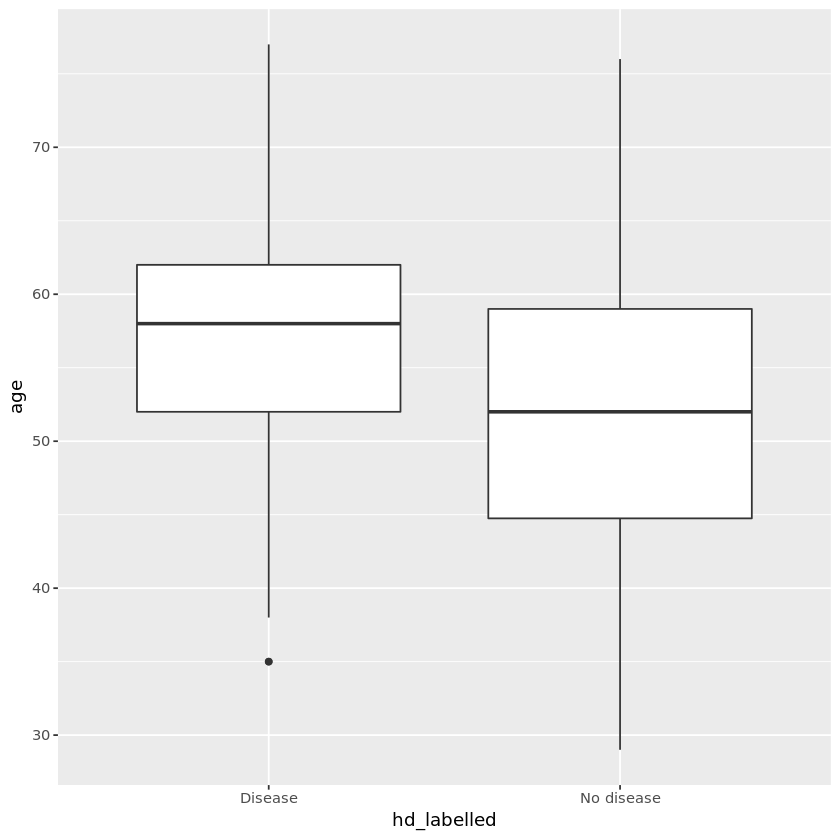

In [7]:
### In addition to p-values from statistical tests, we can plot the age, sex, and maximum heart rate distributions with respect to our outcome variable. 
### Let's plot age using a boxplot since it is a continuous variable
hd_data %>% mutate(hd_labelled = ifelse(hd == 0, "No disease", "Disease")) -> hd_data

### age vs hd
ggplot(data = hd_data, aes(x = hd_labelled, y = age)) + geom_boxplot()

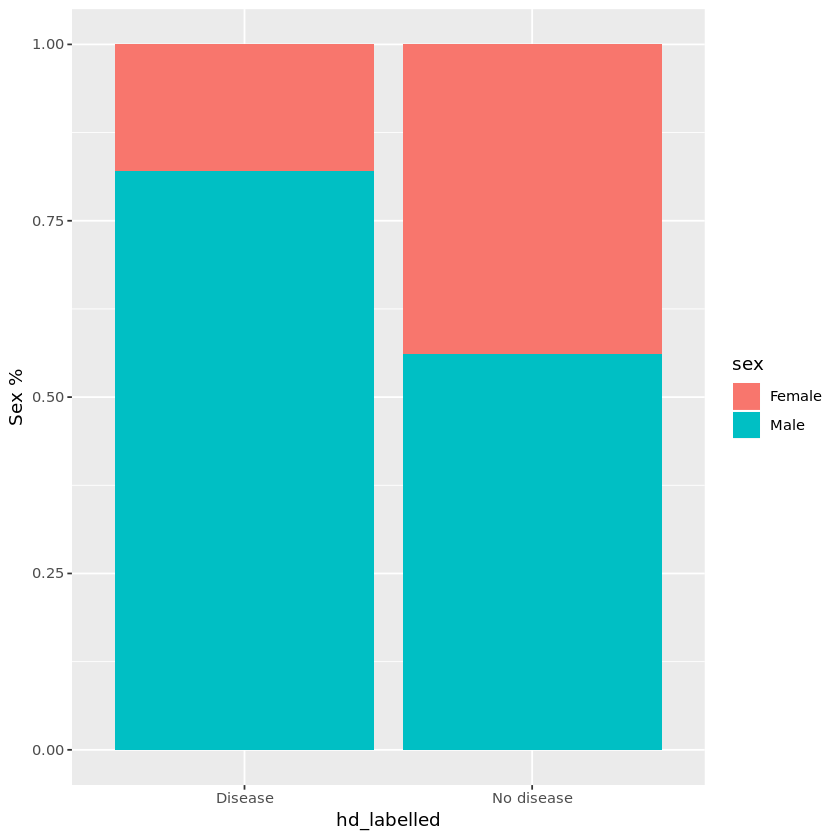

In [8]:
### Next, let's plot sex using a barplot since it is a binary variable in this dataset.
### sex vs hd
ggplot(data = hd_data, aes(x = hd_labelled, fill = sex)) + geom_bar(position = "fill") + ylab("Sex %")

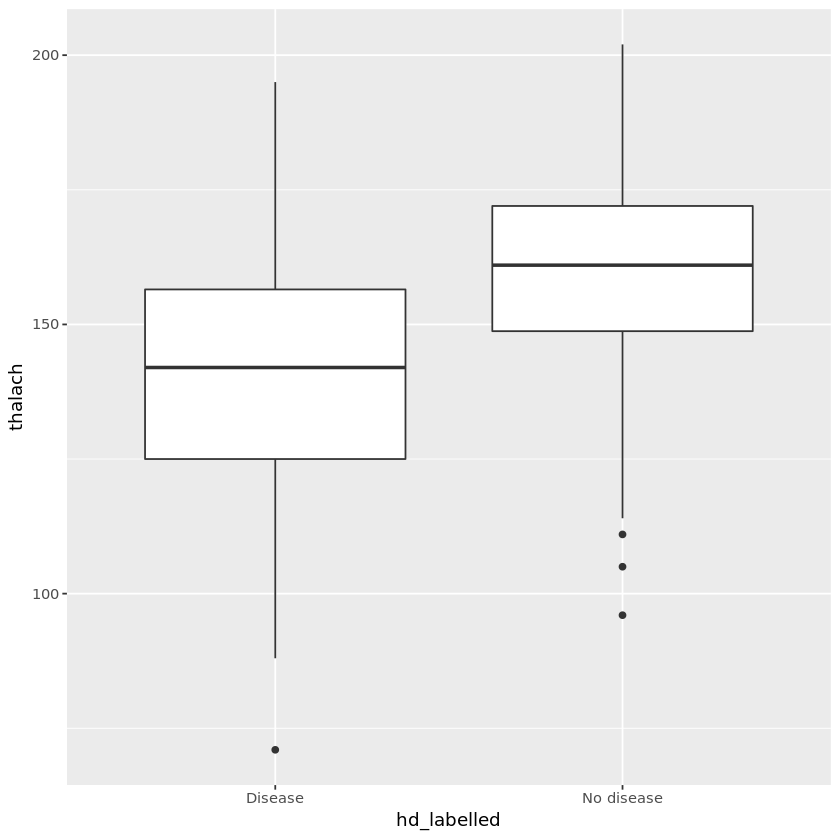

In [9]:
### Max heart rate vs hd
ggplot(data = hd_data, aes(x = hd_labelled, y = thalach)) + geom_boxplot()

# Putting all three variables in one model

In [10]:
#### The plots and the statistical tests both confirmed that all the three variables are highly significantly associated with our outcome (p<0.001 for all tests).
#### Build  Multiple Logistic Regression

model <- glm(data = hd_data, hd ~ age + sex + thalach, family = "binomial" )

summary(model)


Call:
glm(formula = hd ~ age + sex + thalach, family = "binomial", 
    data = hd_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2250  -0.8486  -0.4570   0.9043   2.1156  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.111610   1.607466   1.936   0.0529 .  
age          0.031886   0.016440   1.940   0.0524 .  
sexMale      1.491902   0.307193   4.857 1.19e-06 ***
thalach     -0.040541   0.007073  -5.732 9.93e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 417.98  on 302  degrees of freedom
Residual deviance: 332.85  on 299  degrees of freedom
AIC: 340.85

Number of Fisher Scoring iterations: 4


# Extracting useful information from the model output

In [11]:
##### It's common practice in medical research to report Odds Ratio to quantify how strongly the presence or absence of property A is associated with the presence or absence of the outcome.
##### When the OR is greater than 1, then A is positively associated with outcome B
##### Otherwise, we say A is negatively associated with B 

##### The raw glm coefficient table the 'estimate' column in the printed output in R represents the log(Odds Ratios) of the outcome

##### Therefore, we need to convert the values to the original OR scale and calculate the corresponding 95% Confidence Interval (CI) of the estimated Odds Ratios when reporting results from a logistic regression.




##### Use the broom package to tidy up the model output.
library(broom)

##### Tidy up the coefficient table
tidy_m <- tidy(model)
tidy_m

term,estimate,std.error,statistic,p.value
(Intercept),3.11161046,1.607466382,1.935724,5.290157e-02
age,0.03188572,0.016439824,1.939541,5.243548e-02
sexMale,1.49190218,0.307192627,4.856569,1.194372e-06
thalach,-0.04054143,0.007072952,-5.731897,9.931367e-09


In [12]:
##### Calculate OR
tidy_m$OR <- exp(tidy_m$estimate)



##### Calculate 95% CI and save as lower CI and upper CI
tidy_m$lower_CI <- exp(tidy_m$estimate - 1.96 * tidy_m$std.error)
tidy_m$upper_CI <- exp(tidy_m$estimate + 1.96 * tidy_m$std.error)

#####  Display the updated coefficient table
tidy_m

term,estimate,std.error,statistic,p.value,OR,lower_CI,upper_CI
(Intercept),3.11161046,1.607466382,1.935724,5.290157e-02,22.4571817,0.9617280,524.3946593
age,0.03188572,0.016439824,1.939541,5.243548e-02,1.0323995,0.9996637,1.0662073
sexMale,1.49190218,0.307192627,4.856569,1.194372e-06,4.4455437,2.4346539,8.1173174
thalach,-0.04054143,0.007072952,-5.731897,9.931367e-09,0.9602694,0.9470490,0.9736743


# Predicted probabilities from our model

In [13]:
###### Have built a logistic regression model and examined the model coefficients/ORs.
###### Use this model which is  developed to predict a person's likelihood of having heart disease given his/her age, sex, and maximum heart rate.


######  Translate the predicted probability into a decision rule for clinical use by defining a cutoff value on the probability scale. 
######  When an individual comes in for a health check-up, the doctor would like to know the predicted probability of heart disease
######  For specific values of the predictors: a 45-year-old female with a max heart rate of 150

######  We include the argument type=”response” in order to get our prediction.
pred_prob <- predict(model, hd_data, type="response")

###### Create a decision rule using probability 0.5 as cutoff and save the predicted decision into the main data frame
hd_data$pred_hd <- ifelse(pred_prob >= 0.5, 1, 0)




In [14]:
###### Create a newdata data frame to save a new case information
newdata <- data.frame(age = 45, sex = "Female", thalach = 150)


###### Predict probability for this new case and print out the predicted value
p_new <- predict(model, newdata, type="response")
p_new

1 
0.1773002

# Model performance metrics¶

In [17]:
####### Use some common metrics to evaluate the model performance.
####### The most straightforward one is Accuracy, which is the proportion of the total number of predictions that were correct.




####### We can calculate the classification error rate using 1- accuracy.
####### However, accuracy can be misleading when the response is rare (i.e., imbalanced response).


####### Another popular metric, Area Under the ROC curve (AUC), has the advantage that it's independent of the change in the proportion of responders. AUC ranges from 0 to 1.
#######  The closer it gets to 1 the better the model performance



####### Confusion matrix cross-tabulates the predicted outcome levels against the true outcome levels.

######## Load Metrics package
library(Metrics)




######## Calculate auc, accuracy, clasification error
auc <- auc(hd_data$hd, hd_data$pred_hd) 
accuracy <- accuracy(hd_data$hd, hd_data$pred_hd)
classification_error <- ce(hd_data$hd, hd_data$pred_hd) 

######## Print out the metrics on to screen
print(paste("AUC=", auc))
print(paste("Accuracy=", accuracy))
print(paste("Classification Error=", classification_error))

######## Confusion matrix
table(hd_data$hd, hd_data$pred_hd, dnn=c("True Status", "Predicted Status")) # confusion matrix

[1] "AUC= 0.706483593612915"
[1] "Accuracy= 0.70957095709571"
[1] "Classification Error= 0.29042904290429"


           Predicted Status
True Status   0   1
          0 122  42
          1  46  93

In [16]:
install.packages("Metrics")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [18]:
###########  Prediction of heart disease into csv file
write.csv(hd_data, file = "prediction_of_heart_disease.csv", row.names = F)